<a href="https://colab.research.google.com/github/Faseeh56/Traffic-Accident-Analysis/blob/main/Traffic_Accident_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Required Libraries**

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Load Dataset**

In [19]:
df = pd.read_csv("/content/drive/MyDrive/CSV's/traffic_accidents.csv")
df.head()


,Accident_ID,Date,Time,City,Road_Type,Accident_Severity,Vehicle_Type,Weather,Casualties
0,A0001,2023-04-13,19:28,Multan,Highway,Serious,Car,Clear,2
1,A0002,2023-08-03,10:10,Faisalabad,Highway,Serious,Bike,Rainy,4
2,A0003,2023-09-15,23:43,Quetta,Urban Road,Minor,Bike,Clear,3
3,A0004,2023-11-10,21:43,Lahore,Highway,Minor,Truck,Clear,3
4,A0005,2023-07-07,15:14,Quetta,Urban Road,Serious,Truck,Clear,3


**Dataset Overview**

In [20]:
df.shape

(250, 9)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Accident_ID        250 non-null    object
 1   Date               250 non-null    object
 2   Time               250 non-null    object
 3   City               250 non-null    object
 4   Road_Type          250 non-null    object
 5   Accident_Severity  250 non-null    object
 6   Vehicle_Type       250 non-null    object
 7   Weather            250 non-null    object
 8   Casualties         250 non-null    int64 
dtypes: int64(1), object(8)
memory usage: 17.7+ KB


In [22]:
df.describe(include="all")

,Accident_ID,Date,Time,City,Road_Type,Accident_Severity,Vehicle_Type,Weather,Casualties
count,250,250,250,250,250,250,250,250,250.000000
unique,250,179,231,8,2,3,4,3,NaN
top,A0001,2023-08-21,00:07,Lahore,Highway,Minor,Truck,Clear,NaN
freq,1,4,3,40,131,132,65,161,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.284000
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.349772
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


**Data Preparation**

In [23]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract hour from Time
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M').dt.hour
df.head()


,Accident_ID,Date,Time,City,Road_Type,Accident_Severity,Vehicle_Type,Weather,Casualties,Hour
0,A0001,2023-04-13,19:28,Multan,Highway,Serious,Car,Clear,2,19
1,A0002,2023-08-03,10:10,Faisalabad,Highway,Serious,Bike,Rainy,4,10
2,A0003,2023-09-15,23:43,Quetta,Urban Road,Minor,Bike,Clear,3,23
3,A0004,2023-11-10,21:43,Lahore,Highway,Minor,Truck,Clear,3,21
4,A0005,2023-07-07,15:14,Quetta,Urban Road,Serious,Truck,Clear,3,15


**Accident Frequency by City**

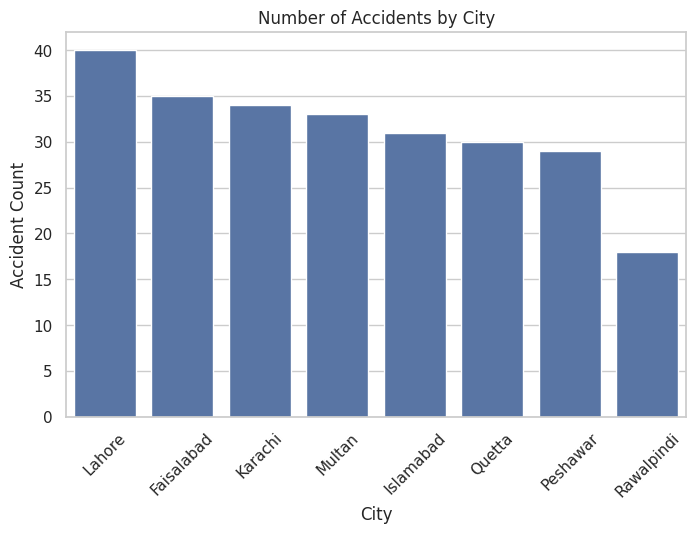

In [24]:
city_accidents = df['City'].value_counts()

plt.figure(figsize=(8,5))
sns.barplot(x=city_accidents.index, y=city_accidents.values)
plt.title("Number of Accidents by City")
plt.xlabel("City")
plt.ylabel("Accident Count")
plt.xticks(rotation=45)
plt.show()


**Accident Severity Distribution**

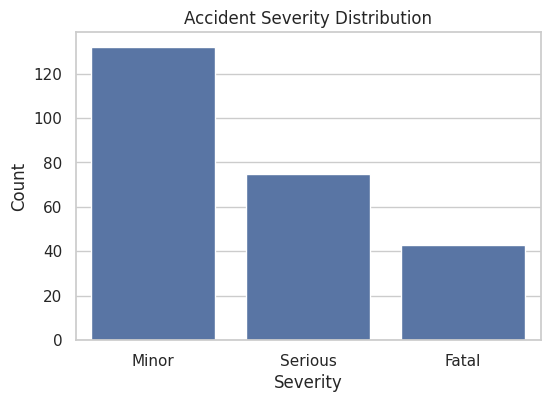

In [25]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Accident_Severity', order=['Minor','Serious','Fatal'])
plt.title("Accident Severity Distribution")
plt.xlabel("Severity")
plt.ylabel("Count")
plt.show()


**Road Type vs Accident Severity**

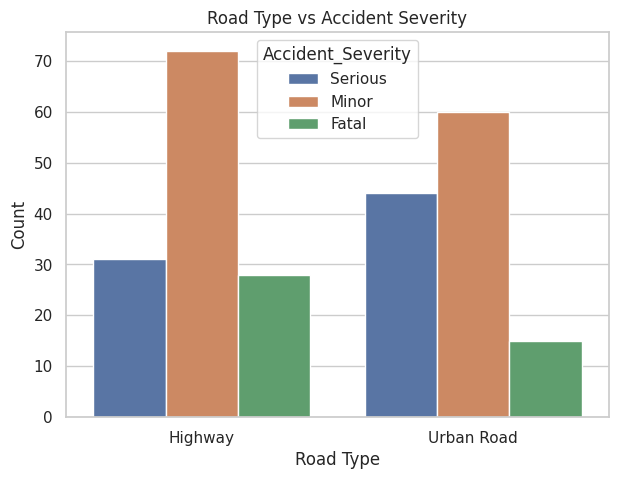

In [26]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='Road_Type', hue='Accident_Severity')
plt.title("Road Type vs Accident Severity")
plt.xlabel("Road Type")
plt.ylabel("Count")
plt.show()


**Peak Accident Hours Analysis**

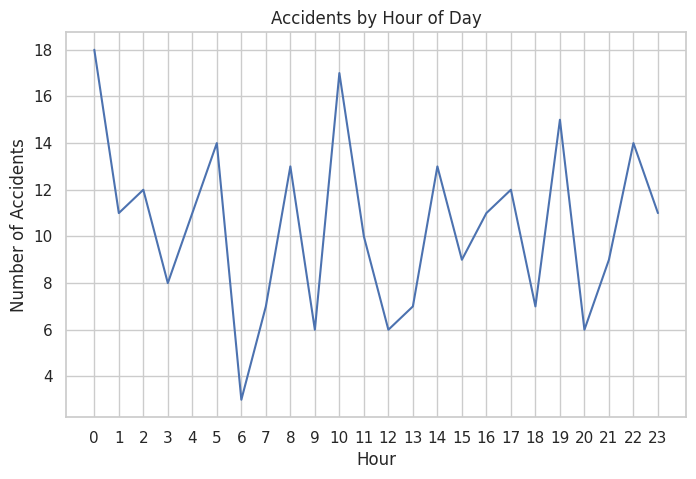

In [27]:
hourly_accidents = df['Hour'].value_counts().sort_index()

plt.figure(figsize=(8,5))
sns.lineplot(x=hourly_accidents.index, y=hourly_accidents.values)
plt.title("Accidents by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Number of Accidents")
plt.xticks(range(0,24))
plt.show()


**Weather Impact on Accidents**

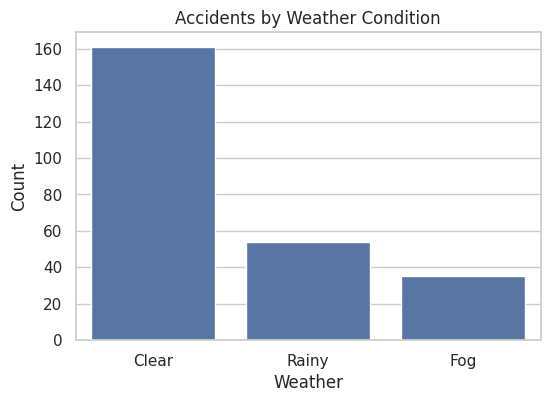

In [28]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Weather')
plt.title("Accidents by Weather Condition")
plt.xlabel("Weather")
plt.ylabel("Count")
plt.show()


**Vehicle Type Involvement**

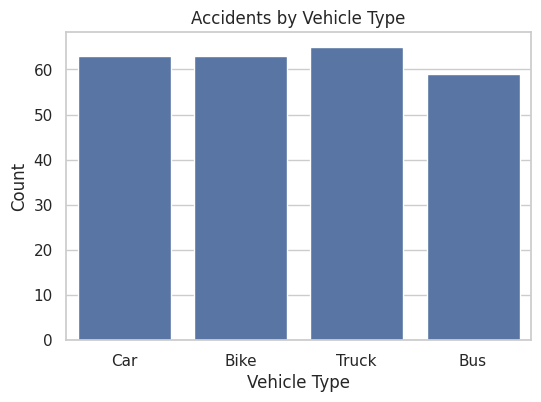

In [16]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Vehicle_Type')
plt.title("Accidents by Vehicle Type")
plt.xlabel("Vehicle Type")
plt.ylabel("Count")
plt.show()


**Casualties Analysis**

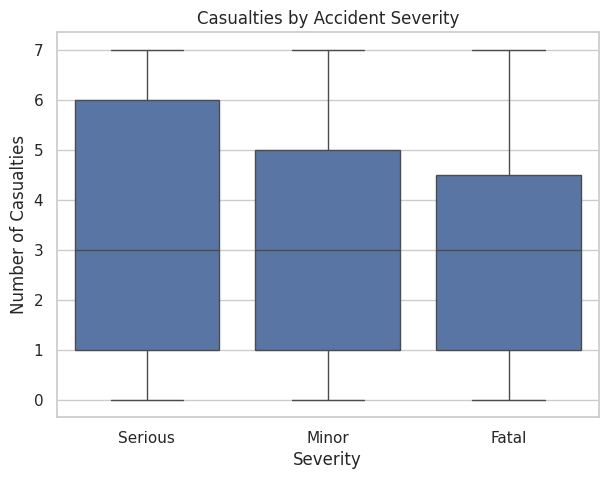

In [17]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x='Accident_Severity', y='Casualties')
plt.title("Casualties by Accident Severity")
plt.xlabel("Severity")
plt.ylabel("Number of Casualties")
plt.show()


**Key Insights:**
1. Major cities like Lahore, Faisalabad and Karachi report higher accident frequencies.
2. Most accidents are minor, but serious accidents still represent a serious concern.
3. Highway roads show a higher number of accidents compared to urbans.
4. Peak accident hours occur during noon and evening rush hours.
5. Foggy and rainy weather conditions decrease accident risk.
6. Bikes and trucks are involved in a significant number of serious accidents.


**Recommendations:**
1. Increase traffic monitoring and enforcement during peak hours.
2. Improve road safety measures on Highway roads.
3. Implement speed controls when the weather is clear.
4. Conduct targeted safety training for bikes and truck drivers.
5. Improve street lighting and road signage in high-risk areas.
